<b>¡Hola Edgar!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!


# PROYECTO SPRINT 13

## Paso 1. Descarga los datos y librerías

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
churn = pd.read_csv('/datasets/gym_churn_us.csv')

## Paso 2. Llevar a cabo el análisis exploratorio de datos (EDA)

#### Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [3]:
print(churn.describe())

            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Excelente trabajo al utilizar <code>describe()</code> para obtener un resumen estadístico de tus datos. Esto te proporciona una visión general útil de las distribuciones y te ayuda a identificar cualquier anomalía o valor atípico potencial. Observa cómo las estadísticas como la media y la desviación estándar pueden darte pistas sobre la variabilidad de tus datos.
</div>


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

<div class="alert alert-block alert-success">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Muy bien al usar <code>info()</code> para verificar la estructura de tu DataFrame. Esto confirma que no hay valores nulos en tus datos, lo cual es un buen punto de partida para el análisis. Tener un conjunto de datos limpio y completo es crucial para obtener resultados precisos en tus modelos.
</div>


**Observaciones:** No se observan valores ausentes, el método describe() arroja una media de 'Churn' de 0.265250 y una desviación estándar de 0.441521.

#### Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [5]:
churn.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<div class="alert alert-block alert-warning">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
Aunque el uso de <code>groupby()</code> para calcular las medias por grupo de 'Churn' es valioso, considera incluir visualizaciones para facilitar la interpretación de estas diferencias. Un gráfico de barras podría ser útil aquí para resaltar visualmente las diferencias en las características entre los clientes que se quedan y los que se van.
</div>


**Observaciones:** Podemos ver que las personas que realizan contratos a periodos más cortos, los que se unieron recientemente y que sus visitas no son regulares suelen ser los que tienen mayor probabilidad de cancelar.

De manera inversa, las personas que realizan contratos a largo plazo, que ya tienen tiempo inscritos y que sus visitas son regulares son los que tienen menor probabilidad de cancelar.

#### Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

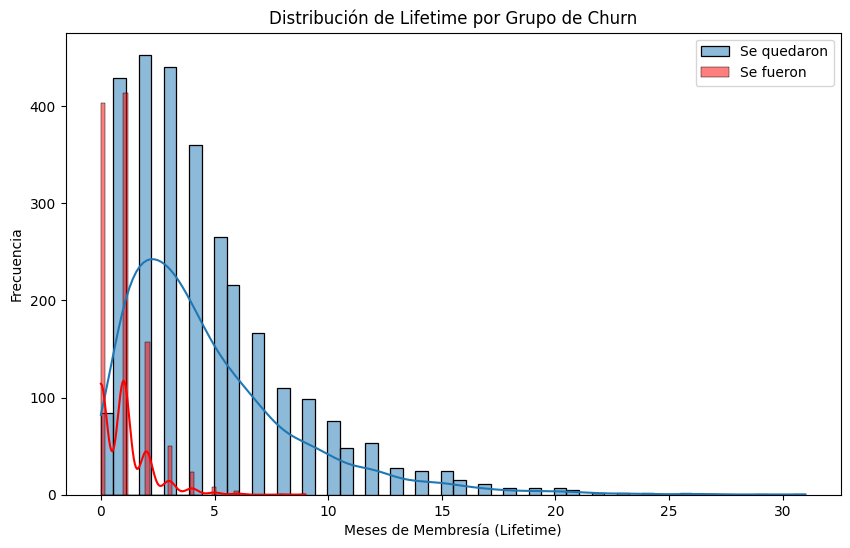

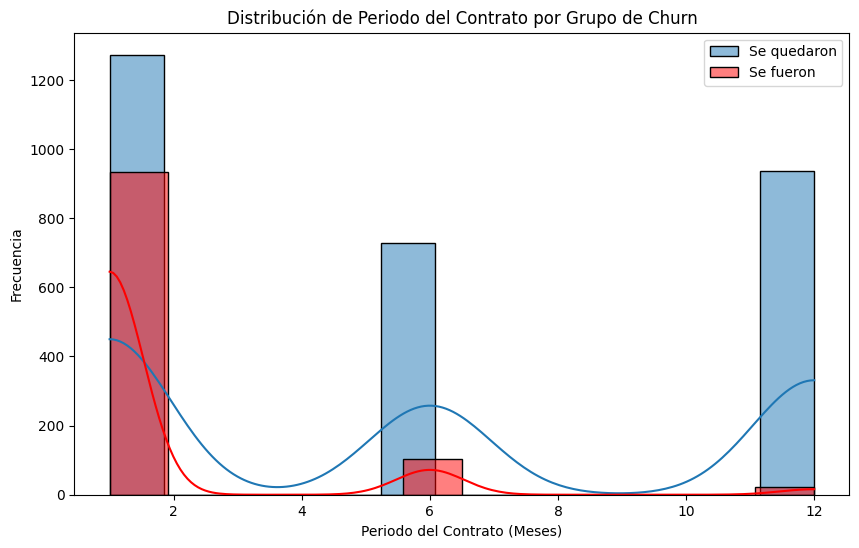

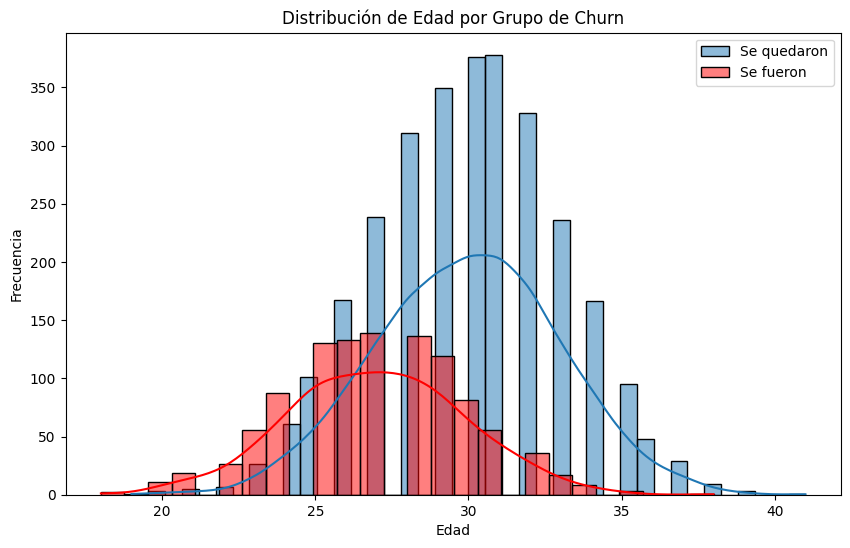

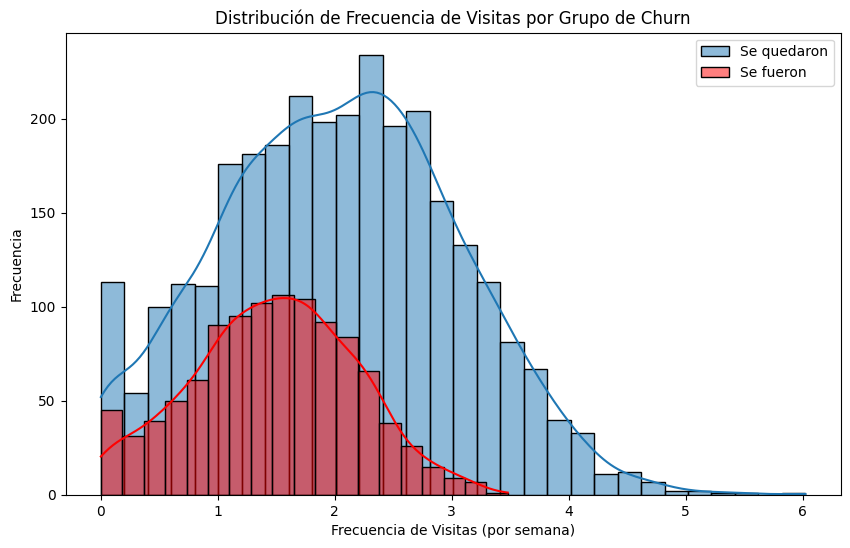

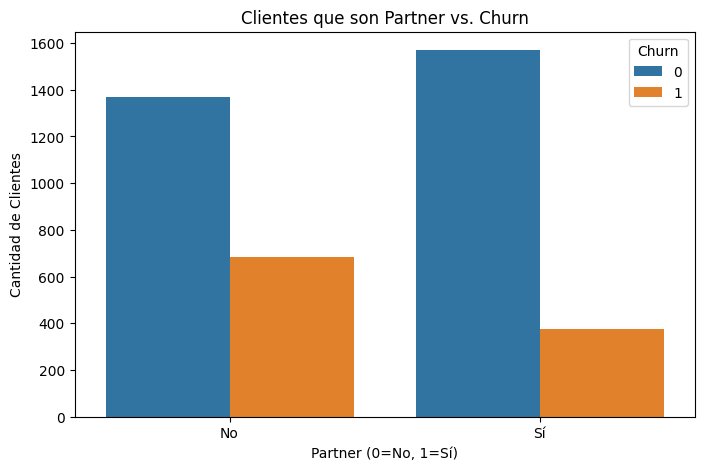

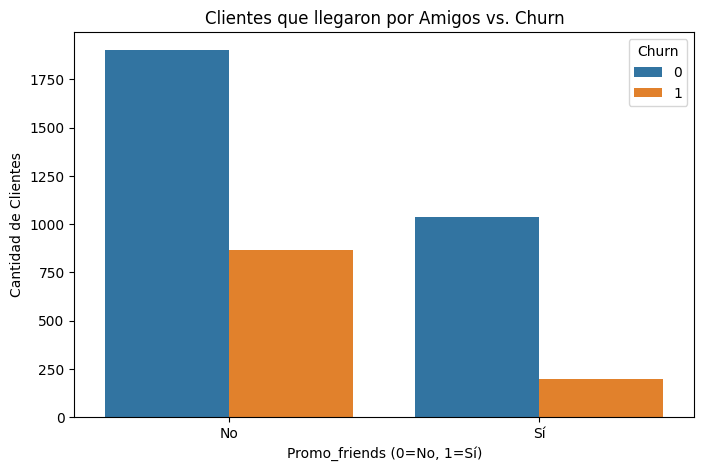

In [6]:
# Separar por grupos
churn_0 = churn[churn['Churn'] == 0]
churn_1 = churn[churn['Churn'] == 1]

# Histograma para 'Lifetime'
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_0, x='Lifetime', kde=True, label='Se quedaron')
sns.histplot(data=churn_1, x='Lifetime', kde=True, color='red', label='Se fueron')
plt.title('Distribución de Lifetime por Grupo de Churn')
plt.xlabel('Meses de Membresía (Lifetime)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Histograma para 'Contract_period'
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_0, x='Contract_period', kde=True, label='Se quedaron')
sns.histplot(data=churn_1, x='Contract_period', kde=True, color='red', label='Se fueron')
plt.title('Distribución de Periodo del Contrato por Grupo de Churn')
plt.xlabel('Periodo del Contrato (Meses)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Histograma para 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_0, x='Age', kde=True, label='Se quedaron')
sns.histplot(data=churn_1, x='Age', kde=True, color='red', label='Se fueron')
plt.title('Distribución de Edad por Grupo de Churn')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Histograma para 'Avg_class_frequency_total'
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_0, x='Avg_class_frequency_total', kde=True, label='Se quedaron')
sns.histplot(data=churn_1, x='Avg_class_frequency_total', kde=True, color='red', label='Se fueron')
plt.title('Distribución de Frecuencia de Visitas por Grupo de Churn')
plt.xlabel('Frecuencia de Visitas (por semana)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Gráfico de barras para 'Partner'
plt.figure(figsize=(8, 5))
sns.countplot(data=churn, x='Partner', hue='Churn')
plt.title('Clientes que son Partner vs. Churn')
plt.xlabel('Partner (0=No, 1=Sí)')
plt.ylabel('Cantidad de Clientes')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

# Gráfico de barras para 'Promo_friends'
plt.figure(figsize=(8, 5))
sns.countplot(data=churn, x='Promo_friends', hue='Churn')
plt.title('Clientes que llegaron por Amigos vs. Churn')
plt.xlabel('Promo_friends (0=No, 1=Sí)')
plt.ylabel('Cantidad de Clientes')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
Has realizado un excelente trabajo al visualizar las distribuciones de varias características clave en relación con el 'Churn'. Esto proporciona una comprensión clara de cómo estas variables pueden influir en el comportamiento de los clientes. Las diferencias en las distribuciones, como en 'Lifetime' y 'Contract_period', pueden indicar patrones importantes en la retención de clientes.
</div>


#### Crea una matriz de correlación y muéstrala.

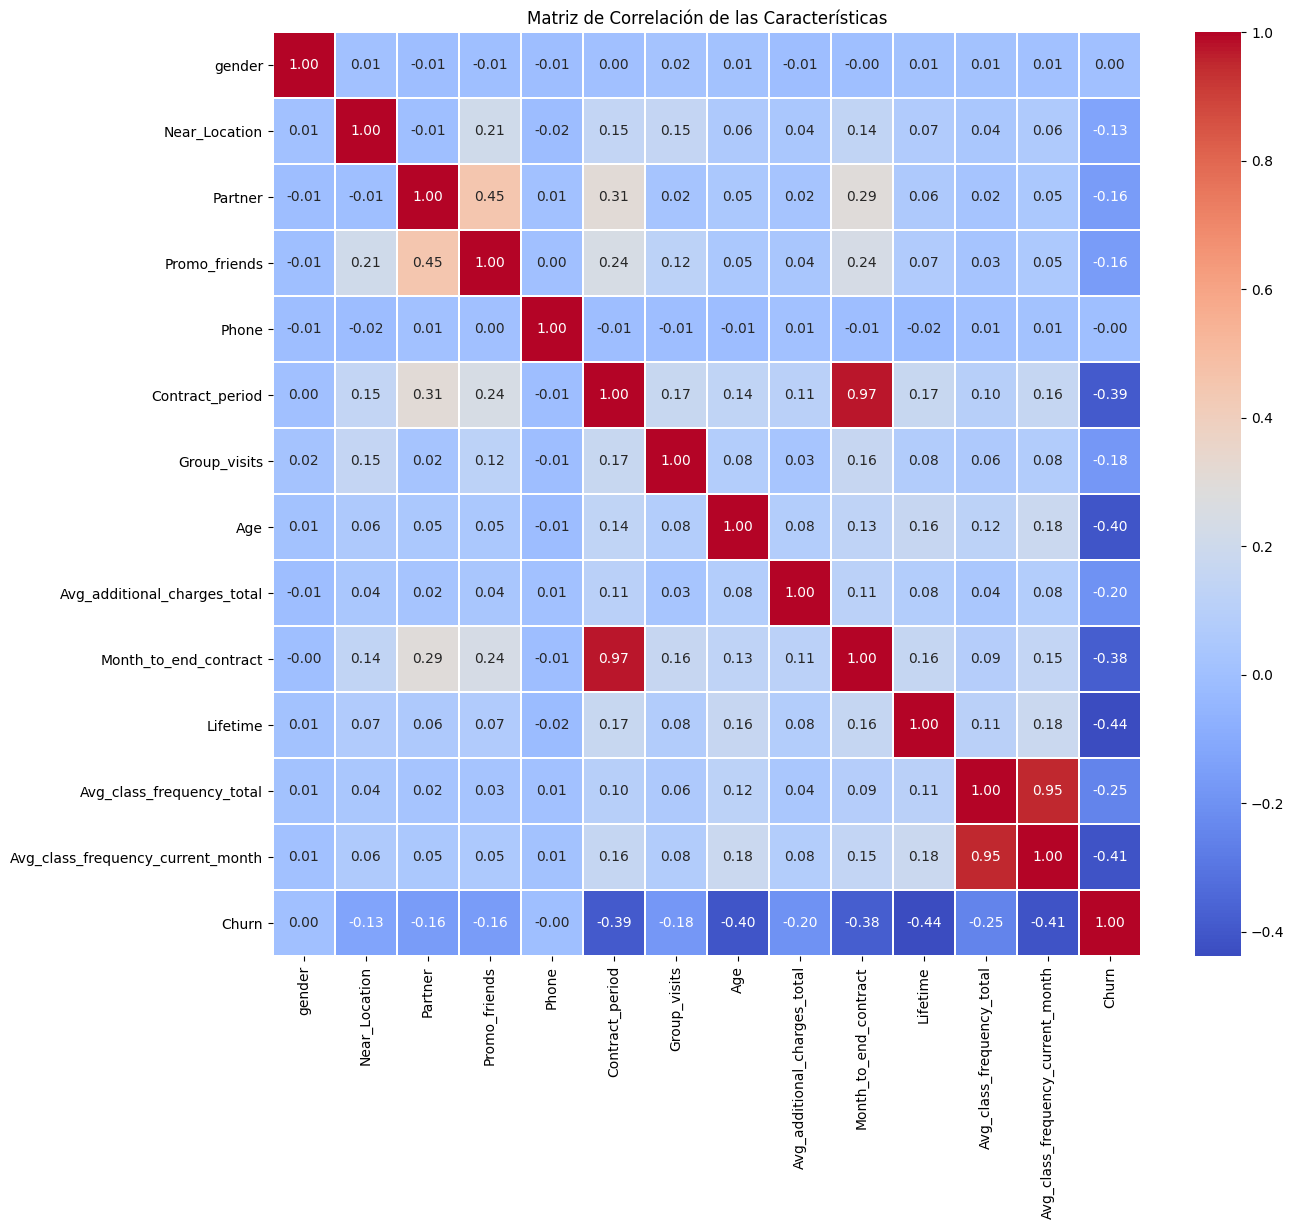

In [7]:
cm = churn.corr()

# Crea el mapa de calor de la matriz de correlación
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='.2f', linewidths=.5, cmap='coolwarm')
plt.title('Matriz de Correlación de las Características')
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
El mapa de calor de la matriz de correlación es una herramienta poderosa para identificar relaciones entre variables. Sería beneficioso discutir las correlaciones más significativas, como aquellas que se acercan a 1 o -1, y cómo podrían impactar en tu análisis y modelos. Por ejemplo, una alta correlación entre 'Contract_period' y 'Churn' podría sugerir que la duración del contrato influye en la retención.
</div>


## Paso 3. Construir un modelo para predecir la cancelación de usuarios

#### Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

##### Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split()

In [8]:
# Define las características (X) y la variable objetivo (y)
X = churn.drop('Churn', axis=1)
y = churn['Churn']

# Divide los datos en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<div class="alert alert-block alert-success">
<b>Celda [8]</b> <a class="tocSkip"></a><br>
Excelente decisión al dividir los datos en conjuntos de entrenamiento y prueba utilizando <code>train_test_split()</code> con estratificación. Esto asegura que la distribución de la variable objetivo se mantenga en ambos conjuntos, lo cual es crucial para obtener una evaluación precisa del modelo.
</div>


##### Entrena el modelo en el set de entrenamiento con dos métodos: regresión logística y bosque aleatorio.

In [9]:
# Entrenar el modelo de Regresión Logística
model_lr = LogisticRegression(solver='liblinear', random_state=42)
model_lr.fit(X_train, y_train)

# Entrenar el modelo de Bosque Aleatorio
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<div class="alert alert-block alert-warning">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
Al entrenar modelos de clasificación, es importante considerar la posibilidad de ajustar hiperparámetros para mejorar el rendimiento. Podrías explorar técnicas como la validación cruzada para optimizar los modelos de Regresión Logística y Bosque Aleatorio. Esto puede ayudarte a encontrar el balance adecuado entre ajuste y generalización.
</div>


##### Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos.

In [10]:
# Evaluación del modelo de Regresión Logística
y_pred_lr = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

print("Métricas para Regresión Logística:")
print(f"Exactitud: {accuracy_lr:.2f}")
print(f"Precisión: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print("-" * 34)

# Evaluación del modelo de Bosque Aleatorio
y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print("Métricas para Bosque Aleatorio:")
print(f"Exactitud: {accuracy_rf:.2f}")
print(f"Precisión: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")

Métricas para Regresión Logística:
Exactitud: 0.93
Precisión: 0.89
Recall: 0.82
----------------------------------
Métricas para Bosque Aleatorio:
Exactitud: 0.93
Precisión: 0.89
Recall: 0.83


<div class="alert alert-block alert-success">
<b>Celda [10]</b> <a class="tocSkip"></a><br>
Has hecho un gran trabajo al evaluar los modelos de clasificación utilizando métricas clave como exactitud, precisión y recall. Esto proporciona una visión clara del rendimiento de cada modelo. Observa cómo el modelo de Bosque Aleatorio tiene un recall ligeramente superior, lo cual podría ser relevante dependiendo de tus objetivos de negocio.
</div>


##### **¿Qué modelo dio mejores resultados?**
Aunque ambos modelos dieron relativamente buenos resultados, el Bosque Aleatorio sería ligeramente mejor dado que tiene un mejor índice de Recall.

## Paso 4. Crear clústeres de usuarios/as

##### Estandariza los datos. Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma.

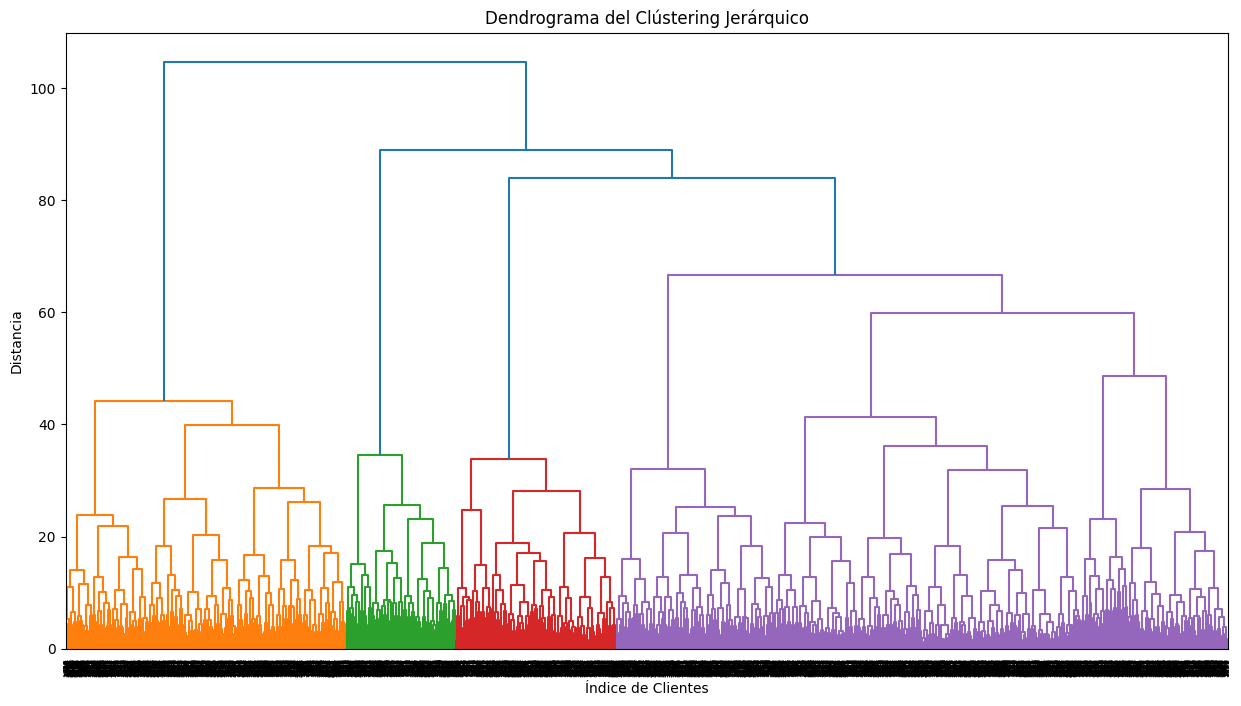

In [11]:
# Excluímos la columna 'Churn'
X = churn.drop('Churn', axis=1)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular la matriz de distancias
linked = linkage(X_scaled, method='ward')

# Trazar el dendrograma
plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top')
plt.title('Dendrograma del Clústering Jerárquico')
plt.xlabel('Índice de Clientes')
plt.ylabel('Distancia')
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [11]</b> <a class="tocSkip"></a><br>
El dendrograma es una excelente manera de visualizar el clustering jerárquico. Sería útil discutir cómo los resultados de este análisis podrían informar tus decisiones de segmentación de clientes. Por ejemplo, identificar grupos de clientes similares puede ayudarte a personalizar estrategias de marketing.
</div>


##### Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes, deja que el número de clústeres sea n=5.

In [12]:
from sklearn.cluster import KMeans

# Entrenar el modelo K-means
km = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = km.fit_predict(X_scaled)

# Añadir la columna de clúster al DataFrame original
churn['cluster_km'] = clusters

# Calcular los valores medios de cada característica para cada clúster
cluster_means = churn.groupby('cluster_km').mean()
print(cluster_means)

              gender  Near_Location   Partner  Promo_friends  Phone  \
cluster_km                                                            
0           0.502370       0.949447  0.829384       0.998420    1.0   
1           0.554556       0.849269  0.263217       0.052868    1.0   
2           0.499422       0.937572  0.737572       0.478613    1.0   
3           0.485738       0.718011  0.299919       0.018745    1.0   
4           0.523316       0.862694  0.471503       0.305699    0.0   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0                  3.097946      0.448657  29.104265   
1                  2.606299      0.436445  30.008999   
2                 11.854335      0.546821  29.905202   
3                  1.914425      0.276284  28.083945   
4                  4.777202      0.427461  29.297927   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km                      

<div class="alert alert-block alert-success">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
El uso de K-means para la segmentación de clientes es una buena elección. Has logrado identificar clústeres que podrían ofrecer información valiosa sobre diferentes grupos de clientes. Considera cómo estas agrupaciones pueden ser utilizadas para desarrollar estrategias específicas de retención o adquisición.
</div>


##### Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?
**Respuesta:**
- El Clúster 3 es el grupo que más probablemente cancele (Churn = 0.57). Tiene contratos cortos, baja frecuencia de visitas y corta vida (lifetime).
- Los Clústeres 1 y 2 son los menos probables que cancelen (Churn = 0.09 y 0.02 respectivamente). Tienen contratos a largo plazo y/o alta frecuencia de visitas.
- Los Clústeres 0 y 4 podría decirse que están en un punto intermedio de riesgo de abandono (Churn = 0.25 y 0.27 respectivamente).

##### Traza distribuciones de características para los clústeres.

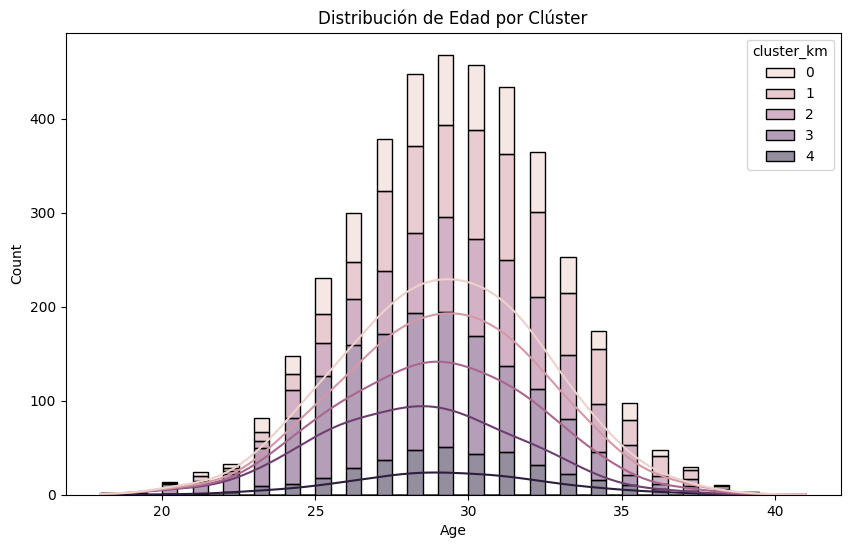

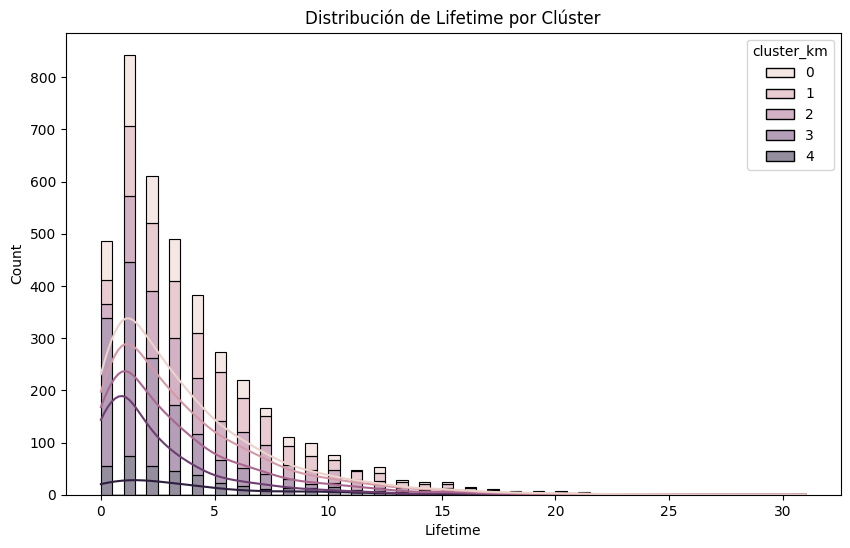

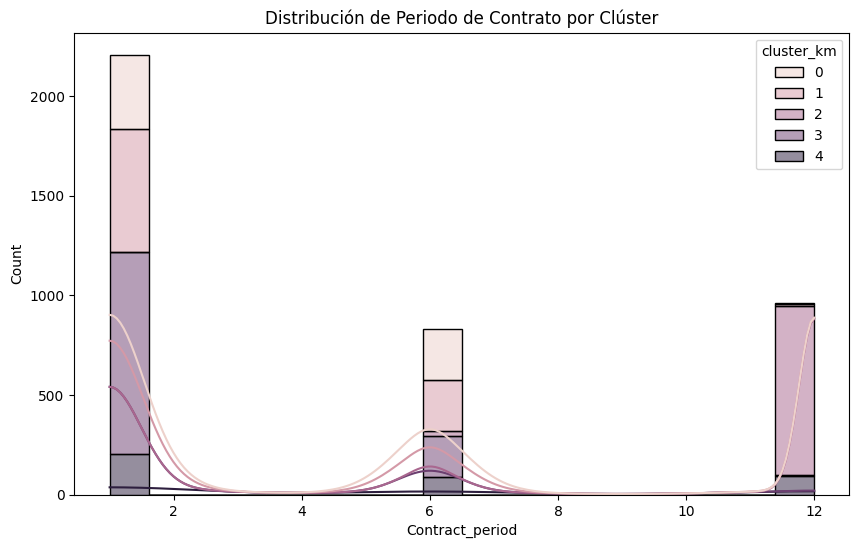

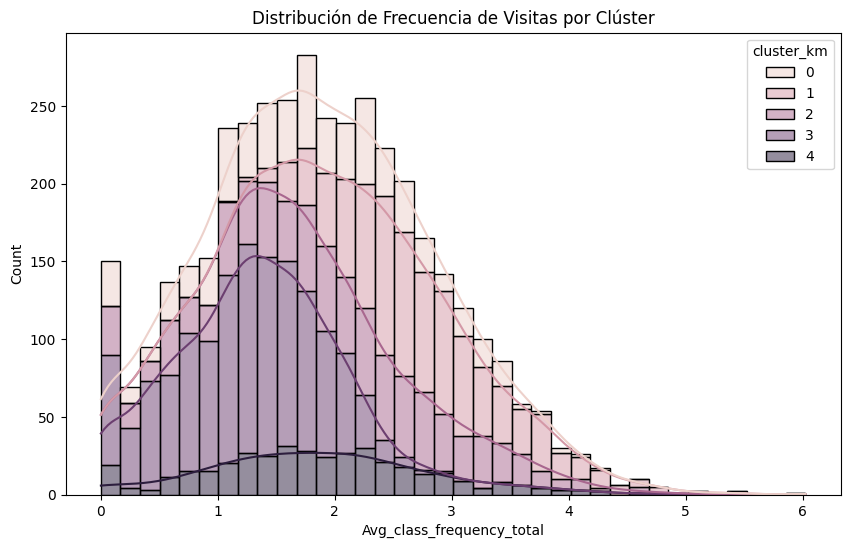

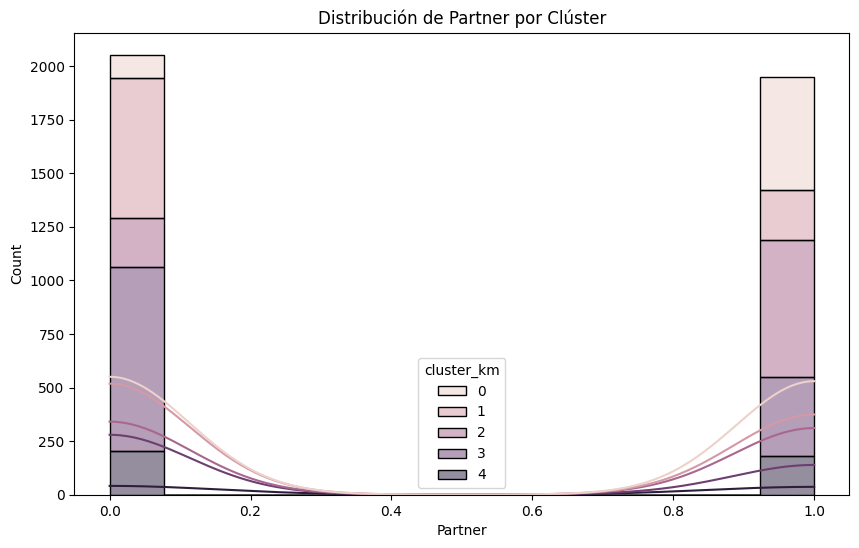

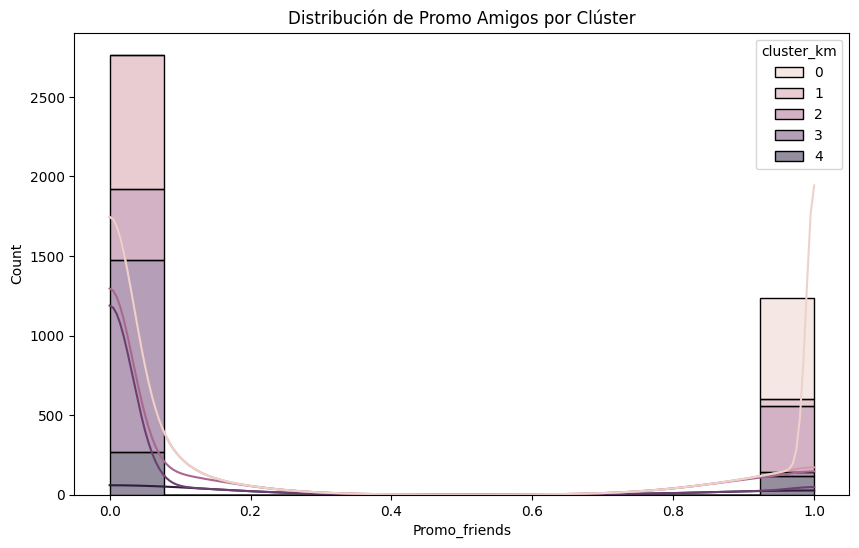

In [13]:
# Visualización para la variable 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(data=churn, x='Age', hue='cluster_km', multiple='stack', kde=True)
plt.title('Distribución de Edad por Clúster')
plt.show()

# Visualización para la variable 'Lifetime'
plt.figure(figsize=(10, 6))
sns.histplot(data=churn, x='Lifetime', hue='cluster_km', multiple='stack', kde=True)
plt.title('Distribución de Lifetime por Clúster')
plt.show()

# Visualización para la variable 'Contract_period'
plt.figure(figsize=(10, 6))
sns.histplot(data=churn, x='Contract_period', hue='cluster_km', multiple='stack', kde=True)
plt.title('Distribución de Periodo de Contrato por Clúster')
plt.show()

# Visualización para la variable 'Avg_class_frequency_total'
plt.figure(figsize=(10, 6))
sns.histplot(data=churn, x='Avg_class_frequency_total', hue='cluster_km', multiple='stack', kde=True)
plt.title('Distribución de Frecuencia de Visitas por Clúster')
plt.show()

# Visualización para la variable 'Partner'
plt.figure(figsize=(10, 6))
sns.histplot(data=churn, x='Partner', hue='cluster_km', multiple='stack', kde=True)
plt.title('Distribución de Partner por Clúster')
plt.show()

# Visualización para la variable 'Promo_friends'
plt.figure(figsize=(10, 6))
sns.histplot(data=churn, x='Promo_friends', hue='cluster_km', multiple='stack', kde=True)
plt.title('Distribución de Promo Amigos por Clúster')
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
Las visualizaciones de las distribuciones por clúster son informativas. Considera añadir interpretaciones sobre cómo estas diferencias pueden influir en las estrategias de retención de clientes. Por ejemplo, si un clúster tiene una mayor tasa de churn, podrías investigar qué características lo distinguen y cómo abordarlas.
</div>


##### ¿Notas algo?
**Respuesta:**

##### Calcula la tasa de cancelación para cada clúster (utiliza el método groupby())

In [14]:
churn_rate_by_cluster = churn.groupby('cluster_km')['Churn'].mean()
print(churn_rate_by_cluster)

cluster_km
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


<div class="alert alert-block alert-success">
<b>Celda [14]</b> <a class="tocSkip"></a><br>
Has calculado correctamente la tasa de churn por clúster, lo cual es crucial para entender qué grupos de clientes son más propensos a abandonar el servicio. Esta información puede ser invaluable para dirigir esfuerzos de marketing específicos hacia los clústeres con mayor riesgo de churn.
</div>


##### ¿Difieren en términos de tasa de cancelación?
**Respuesta:**
Si, el cluster 3 tiene la tasa más alta, luego como tasas medias tenemos los clústeres 0 y 4 y las tasas más bajas pertenecen a los clústeres 1 y 2.

##### ¿Qué grupos son propensos a irse y cuáles son leales?
**Respuesta:** El clúster más propenso a irse es el 3 al tener la tasa de cancelación más alta, mientras que los clústeres 1 y 2 son los más leales al tener las tasas de cancelación más bajas. Finalmente los clústeres 0 y 4 se encuentran en un punto intermedio.

## Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

Los clientes que inician su membresía y que eligen un contrato corto son altamente propensos a cancelar.

Podrían diseñarse estrategias o programas que de alguna manera incentiven a los usuarios a continuar, quizás que promuevan el sentido de pertenencia, entre otros, de modo que se disminuya la tasa de cancelación.

Los programas de Partner y Promo Friends podrían reforzarse, dado que ambos programas ofrecen descuento a nuevos usuarios, sin embargo no son parte de algún otro incentivo que promueva que los usuarios quieran quedarse.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Edgar! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Realizaste un análisis exploratorio de datos detallado y bien estructurado.<br>
• Utilizaste visualizaciones efectivas para ilustrar las distribuciones de las variables.<br>
• Implementaste modelos de clasificación con una evaluación exhaustiva de métricas.<br>
• Aplicaste técnicas de clustering para segmentar clientes de manera efectiva.<br>
• Mantuviste una buena organización y limpieza de los datos.<br>
• Usaste correctamente la estratificación en el conjunto de datos de prueba.<br>
• Exploraste diferentes modelos de machine learning para obtener mejores resultados.<br>
• Calculaste y analizaste correctamente las tasas de churn por clúster.<br>
• Empleaste técnicas de estandarización para mejorar la calidad del clustering.<br>
• Mostraste una comprensión clara de las correlaciones entre variables.<br>
¡Felicidades!
</div>
